### Multithreading and multiprocessing

Program: program is a sequence of instructions written in programming languages.
eg= google chrome => .exe => program => how Browser should work.
word, excel etc.



Process: A process is simply an instance of a program that is being executed.
like any number of browser of google chrome are processes


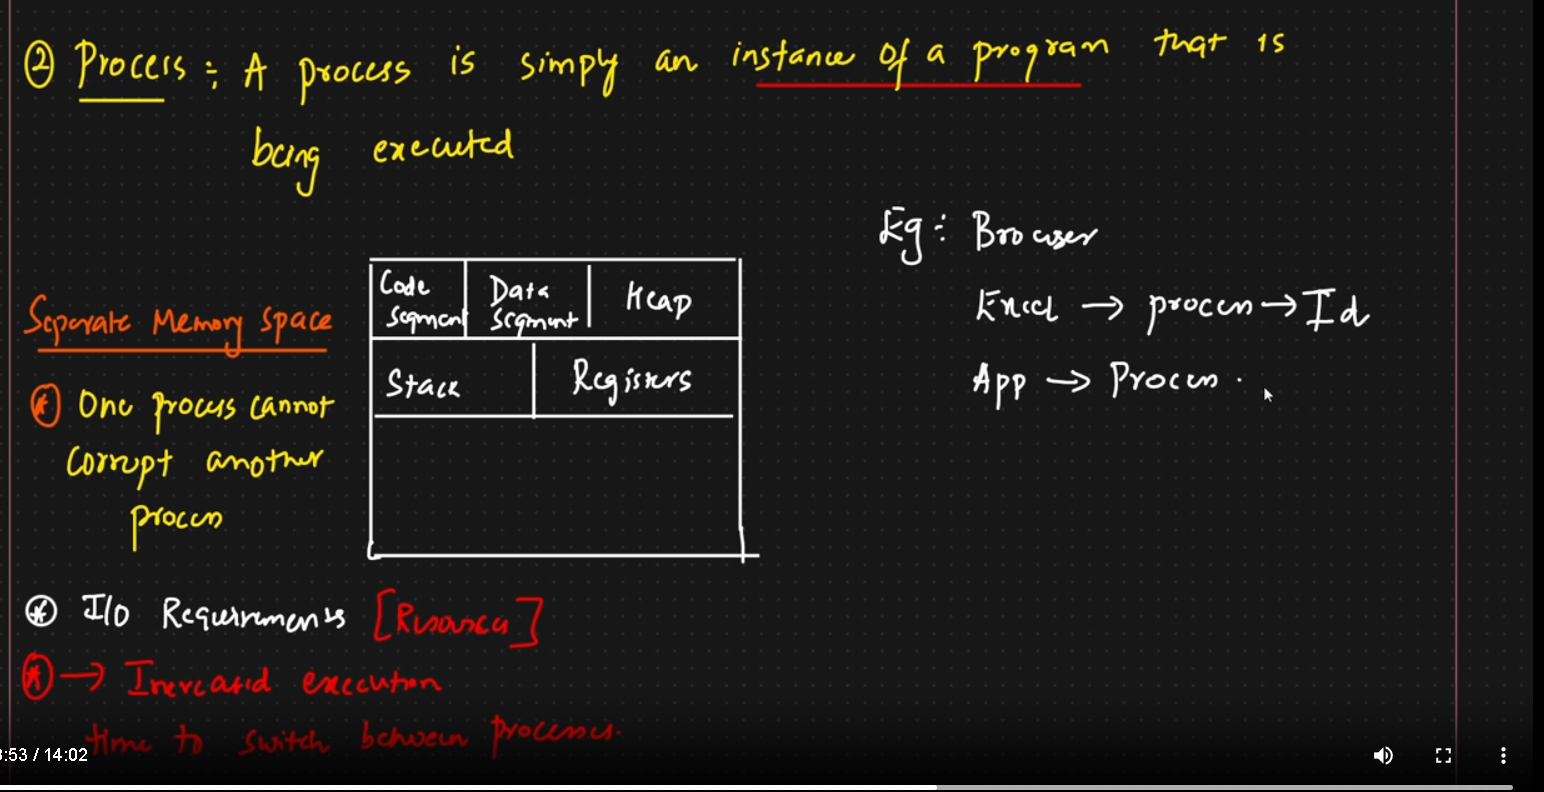

Thread: A thread is a unit of execution with a process

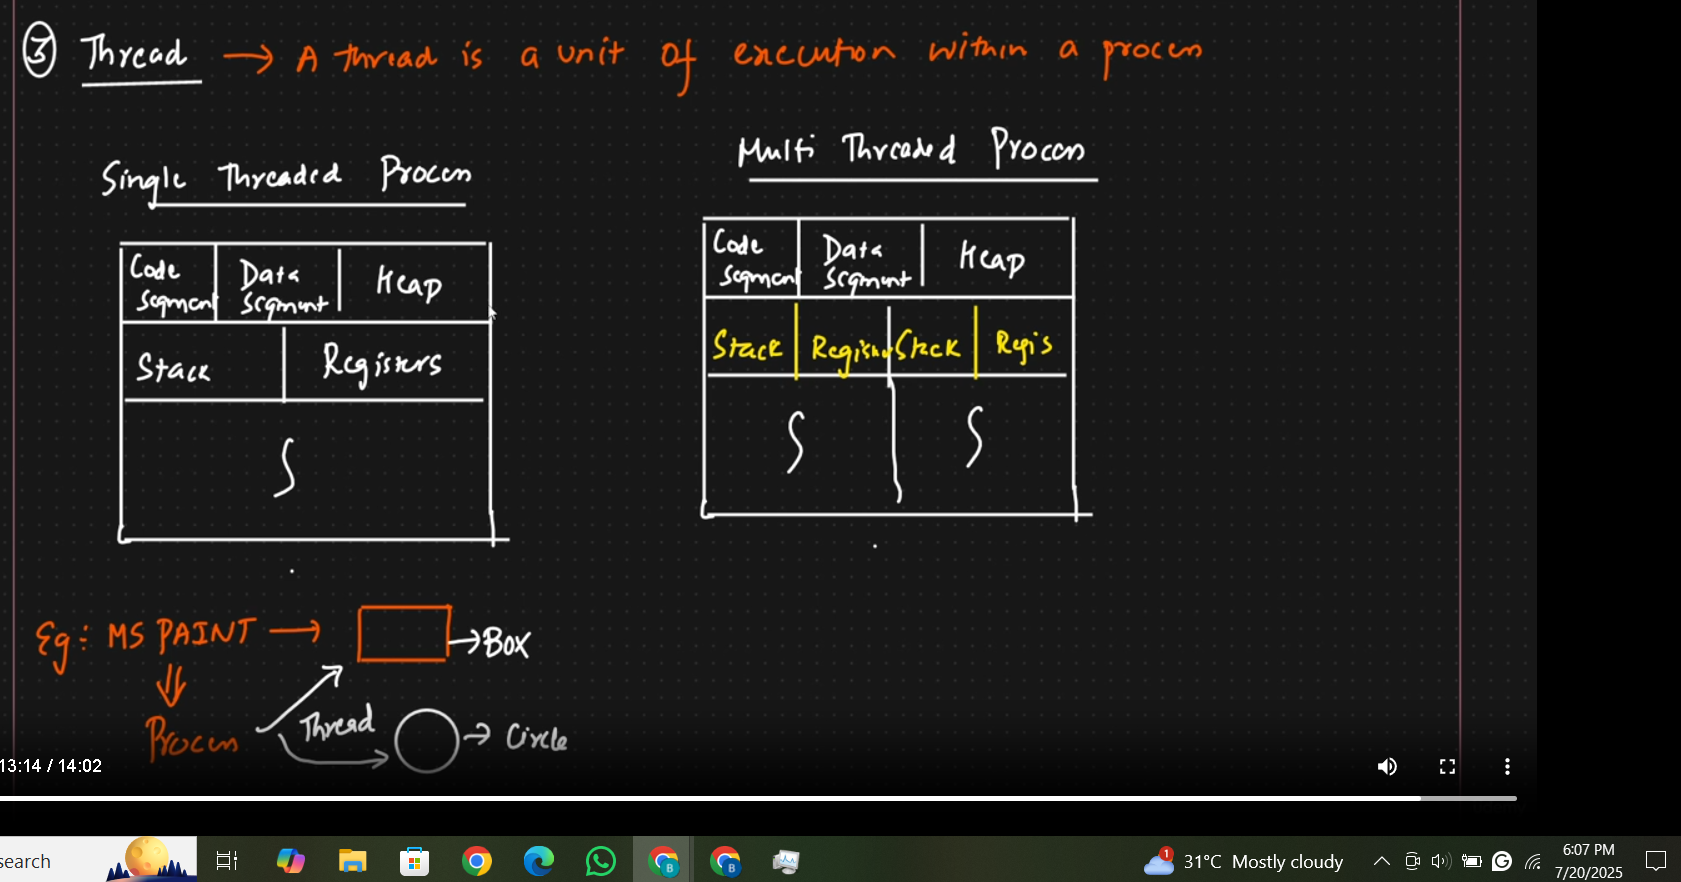

In [ ]:
# multithreading
# when to use multi threading
# 1. I/O-bound tasks: tasks that spend more time waiting for I/O operations
## 2. Concurrent execution: when you want to improve the throughput
### of your application by performing multiple operations concurrently.


import threading
import time

def print_numbers():
  for i in range(5):
    time.sleep(2)  # some i/o operations
    print(f"Number: {i}")

def print_letters():
  for i in "abcde":
    time.sleep(2)
    print(f"Letter: {i}")

t =time.time()

print_numbers()
print_letters()

finished_time = time.time() - t

print(finished_time)

Number: 0
Number: 1
Number: 2
Number: 3
Number: 4
Letter: a
Letter: b
Letter: c
Letter: d
Letter: e
20.003861665725708


In [ ]:
def print_numbers():
  for i in range(5):
    time.sleep(2)  # some i/o operations
    print(f"Number: {i}")

def print_letters():
  for i in "abcde":
    time.sleep(2)
    print(f"Letter: {i}")

## create 2 threads
t1 = threading.Thread(target= print_numbers)
t2 = threading.Thread(target= print_letters)

t =time.time()

# start the thread
t1.start()
t2.start()

# wait for the threads to complete
t1.join()
t2.join()

finished_time = time.time() - t

print(finished_time)

Number: 0
Letter: a
Number: 1
Letter: b
Number: 2
Letter: c
Number: 3
Letter: d
Number: 4
Letter: e
10.002760410308838


In [ ]:
## Multiprocessing
# processes that run in parallel
# when to use
# 1. CPU-Bound tasks: heavy tasks
## 2. Parallel execution: Multiple cores of the CPU

import multiprocessing
import time

def square_numbers():
  for i in range(5):
    time.sleep(1)
    print(f"Square: {i*i}")

def cube_numbers():
  for i in range(5):
    time.sleep(1.5)
    print(f"Cube: {i*i*i}")

if __name__ == "__main__":

  # create 2 processes
  p1 = multiprocessing.Process(target = square_numbers)
  p2 = multiprocessing.Process(target= cube_numbers)

  t = time.time()
  # start the process
  p1.start()
  p2.start()

  # wait for process to complete
  p1.join()
  p2.join()

  finished_time = time.time() - t
  print(finished_time)



Square: 0
Cube: 0
Square: 1
Square: 4
Cube: 1
Square: 9
Cube: 8
Square: 16
Cube: 27
Cube: 64
7.537964820861816


In [ ]:
## Multithreading with Thread Pool executor

from concurrent.futures import ThreadPoolExecutor
import time

def print_numbers(number):
  time.sleep(1)
  return f"Number: {number}"

numbers = [1,2,3,4,5]

with ThreadPoolExecutor(max_workers = 3) as executor:
  results = executor.map(print_numbers, numbers)

for result in results:
  print(result)

Number: 1
Number: 2
Number: 3
Number: 4
Number: 5


In [ ]:
# Multiprocessing with ProcessPoolExecutor

from concurrent.futures import ProcessPoolExecutor
import time

def square_number(number):
  time.sleep(1)
  return f"Square: {number * number}"

numbers= [1,2,3,4,5]

if __name__ == "__main__":
  with ProcessPoolExecutor(max_workers=3) as executor:
    results = executor.map(square_number, numbers)

  for result in results:
    print(result)

Square: 1
Square: 4
Square: 9
Square: 16
Square: 25


In [ ]:
'''
Real-world example: Multithreading for I/O bound Tasks
Scenario: Web Scraping
Web scraping often involves making numerous network requests to fetch
web pages. These tasks are I/O bound because they spend a lot of time
waiting for responses from servers. Multithreading can significantly improve
the performance by allowing multiple web pages to be fetched concurrently.

'''

import threading
import requests
from bs4 import BeautifulSoup # for web scrapping

urls= [
'https://python.langchain.com/docs/introduction/',
'https://python.langchain.com/docs/concepts/',
'https://python.langchain.com/docs/tutorials/'
]

def fetch_content(url):
  response = requests.get(url)
  soup = BeautifulSoup(response.content, "html.parser")
  print(f"fetched {len(soup.text)} characters from {url}")
  #print(soup.text)

threads = []

for url in urls:
  thread = threading.Thread(target=fetch_content, args=(url, ))
  threads.append(thread)
  thread.start()

for thread in threads:
  thread.join()

print("all web pages fetched")


fetched 9853 characters from https://python.langchain.com/docs/tutorials/
fetched 16315 characters from https://python.langchain.com/docs/concepts/
fetched 12264 characters from https://python.langchain.com/docs/introduction/
all web pages fetched


In [ ]:
'''
Real wold example: Multiprocessing for cpu bound tasks
scenario: Factorial calculation
factorial calculation, especially for large numbers, involve significant
computational work. multiprocessing can be used to  distribute the
workload across multiple cpu cores, improving performance.
'''

import multiprocessing
import math
import sys
import time

# increase the max number of digits for integer conversion
sys.set_int_max_str_digits(100000)

# fuction to compute factorial of a given number
def compute_factorial(number):
  print(f'computing factorial of {number}')
  result = math.factorial(number)
  print(f'factorial of {number} is {result}')
  return result

if __name__ == "__main__":
  numbers= [5000, 6000, 700, 8000]

  start_time = time.time()

  # create a pool of worker processes
  with multiprocessing.Pool() as pool:
    results = pool.map(compute_factorial, numbers)

  end_time = time.time()

  print(f"Results: {results}")
  print(f"Time taken: {end_time -start_time} seconds")

computing factorial of 5000computing factorial of 6000

factorial of 6000 is 26839997657267395961163166474627355122050186046884725685824261445661070965868578859479409748346329836182703089128852632609939583160469201526637034786976396625075825887529584878861523984702266296018595427551580174654216923424895644549809732165397549500287960097044436776098097112285935902002318300817766074944639865419157280524790653203290253917356133633993978535760253069357555142219669129998317026518032402810751448010557484004254745274140263837210122325107062378927575415179640798325598920907738968963426553833519168033920097139867697345016081563676374441238664213080213666256929097791375199485350231595456497900149202746728755327879812971546373369370677385700341673192285360910112728679385205719710580583641371671892447976818829243817888754721448962887123232268424960754147650482415903026606790467209849563662271416952282649322598751397802523984319920253594583722082455006753362159905925741054970039726329277310783778301